## Solution

In [47]:
import math
import random

#Determines if a point on the sandwich is edible or not.
def sandwich_point(x,y):
    center = (50,50)

    per_dist = []
    per_dist.append(math.hypot(0, y - 100))
    per_dist.append(math.hypot(0, y - 0))
    per_dist.append(math.hypot(x - 100, 0))
    per_dist.append(math.hypot(x, 0))
    cent_dist = math.hypot(x - 50, y - 50)

    eatable = 1
    for i in per_dist:
        if i < cent_dist: edible=0
    return edible

In [88]:
#Randomly select 10,000,000 points on the sandwich face.
#Calculate the percenta
points = []
edible_hist = []
for i in range(0,10000000):
    point = (random.random()*100,random.random()*100)
    edible = sandwich_point(point[0],point[1])
    if edible ==1: points.append(point)
    edible_hist.append(edible)
print "{0:.3f}%".format(100.0*sum(edible_hist)/len(edible_hist))

21.887%


## Distribution of Edible Points

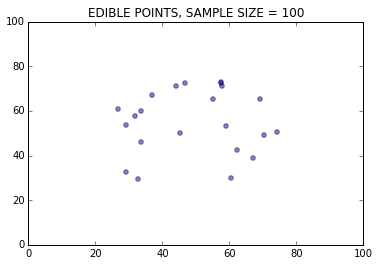

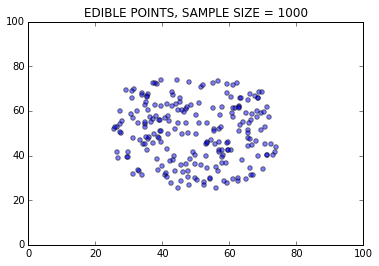

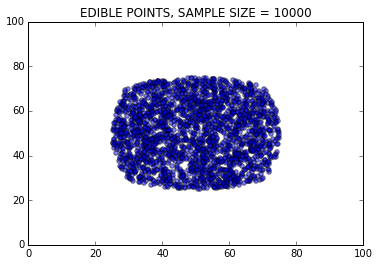

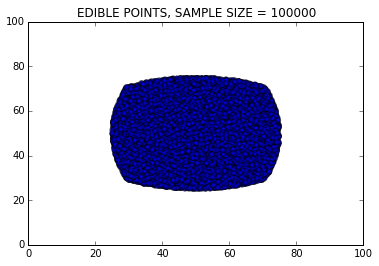

In [90]:
#Scatterplot of the edible points under various sample sizes
for j in [100,1000,10000,100000]:
    points = []
    eatable_hist = []
    for i in range(0,j):
        point = (random.random()*100,random.random()*100)
        eatable = sandwich_point(point[0],point[1])
        if eatable ==1: points.append(point)
        eatable_hist.append(eatable)

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    points_np = np.asarray(points)

    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([0,100])
    
    #Scatterplot of the edible points
    plt.scatter(points_np[:,0], points_np[:,1], alpha=0.5)    
    plt.title('EDIBLE POINTS, SAMPLE SIZE = %i'%(j))
    plt.show()

## Mean Edible Percentage by Sample Size

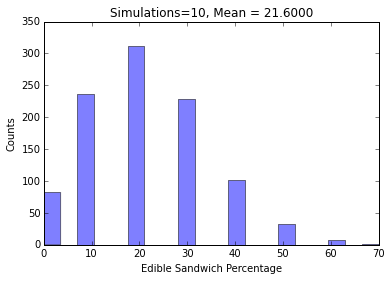

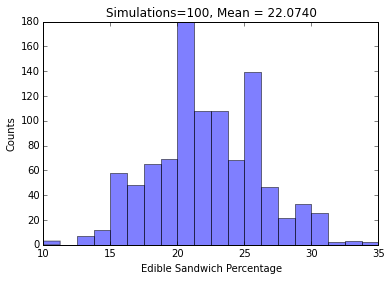

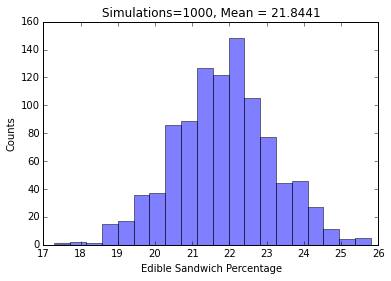

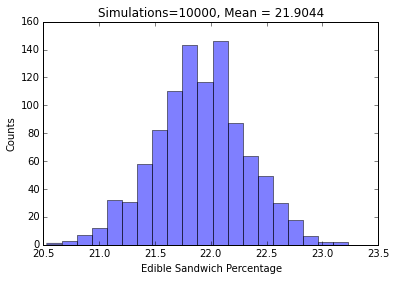

In [97]:
#List of iterations to show
iteration_attempts = (10,100,1000,10000)

for n in iteration_attempts:
    means = [] #Clear array of means for each set of iterations

    #Run 1,000 examples of n simulations
    for j in range(0,1000):
        points = []
        edible_hist = []
        for i in range(0,n):
            point = (random.random()*100,random.random()*100)
            edible = sandwich_point(point[0],point[1])
            if edible ==1: points.append(point)
            edible_hist.append(edible)
            
        means.append(100.0*sum(edible_hist)/len(edible_hist))
        

    #Plot a histogram of the means
    plt.hist(means,20, normed=0, facecolor='blue', alpha=0.5)
    plt.xlabel('Edible Sandwich Percentage')
    plt.ylabel('Counts')
    plt.title('Simulations=%i, Mean = %.4f'%(n,np.mean(means)))

    plt.show()